<a href="https://colab.research.google.com/github/KarolSzozda/smog/blob/main/Final_Pollution8_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wstęp**
Zjawisko smogu w ostatnich latach zdecydowanie przybrało na znaczeniu, stało się bardziej powszechne oraz zyskało na medialności. W Polsce niechlubne miano synonimu smogu przyznano miastu Kraków. Chociaż dla osób zamieszkujących to miejsce, z biegiem lat zjawisko te spowszechniało, tak dla ludzi odwiedzających miasto jest ono nie rzadko wręcz przytłaczające. Wjeżdżając do Krakowa, można na własnej skórze doświadczyć, jak początkowo niebieskie niebo szarzeje, żeby na końcu stać się znacząco przydymionym. W stolicy małopolski na stan ten znaczący wpływ mają takie czynniki niekorzystne położenia miasta w dolinie Wisły, słaba jakość infrastruktury grzewczej (stare piece grzewcze, niskiej jakości opał), jak i zanieczyszczenia przemysłowe oraz komunikacyjne. Poza oczywistymi efektami wizualnymi smog niestety niesie ze sobą wiele innych, bardziej niebezpiecznych konsekwencji dla zdrowia człowieka.

---

W styczniu 2017 w południowej Polsce wystąpiło rekordowo wysokie zanieczyszczenie powietrza. Z uwagi na dostepność danych z tego roku, postanowiliśmy stworzyć model prognozujacy szacunkowe stężenie pyłów PM10 bazując na danych pochodzących z 56 czujników rozlokowanych w różnych częściach Krakowa. Pod uwagę wzięlismy korelację steżenia pyłów w stosunku do warunków atmosferycznych takich jak: temperatura powietrza, wilgotność, ciśnienie czy prędkość wiatru.

---
Dodatkowe informacje:


*   PM1 nie jest skalibrowany i dlatego może być większy niż PM2,5
*   PM2,5 może być większy niż PM10 w granicach błędu pomiaru
*   Przez pierwsze dwa miesiące wilgotność i temperatura nie były kalibrowane i dlatego mogą pokazywać niedokładne wartości












# **Przygotowanie środowiska pracy**

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download -d datascienceairly/air-quality-data-from-extensive-network-of-sensors

air-quality-data-from-extensive-network-of-sensors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip air-quality-data-from-extensive-network-of-sensors.zip

Archive:  air-quality-data-from-extensive-network-of-sensors.zip
replace april-2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: april-2017.csv          
  inflating: august-2017.csv         
  inflating: december-2017.csv       
  inflating: february-2017.csv       
  inflating: january-2017.csv        
  inflating: july-2017.csv           
  inflating: june-2017.csv           
  inflating: march-2017.csv          
  inflating: may-2017.csv            
  inflating: november-2017.csv       
  inflating: october-2017.csv        
  inflating: sensor_locations.csv    
  inflating: september-2017.csv      


In [4]:
import os
os.getcwd()

'/content'

# **Wczytywanie bibliotek**

In [5]:
#Biblioteki
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import keras
import cv2

#Tworzenie modeli
from sklearn.model_selection import train_test_split #do rozdzielania danych na zbiór testowy i treningowy
from sklearn.model_selection import GridSearchCV #sprawdzanie kombinacji parametrów
from sklearn.tree import DecisionTreeRegressor #model drzewa decyzyjnego
from sklearn.linear_model import LinearRegression #model regresji liniowej
from sklearn.preprocessing import PolynomialFeatures #model wielomianu
from sklearn.preprocessing import StandardScaler #do standaryzacji danych
from sklearn.pipeline import make_pipeline #tworzenie przepływu danych i uczenia modelu na nich
from sklearn.model_selection import GridSearchCV #sprawdzanie kombinacji parametrów
from sklearn.dummy import DummyRegressor #do porównania modeli
from sklearn.model_selection import TimeSeriesSplit #crosswalidacja dla szeregów czasowych
from sklearn.ensemble import RandomForestRegressor #regresor drzewa decyzyjnego
from sklearn.datasets import make_regression #regresor drzewa decyzyjnego
from zipfile import ZipFile #do ZIPow

#Metryki
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc,roc_auc_score, classification_report #do oceny modelu
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Wczytywanie zbiorów danych**

In [6]:
smog = pd.concat(
    [pd.read_csv(ZipFile("air-quality-data-from-extensive-network-of-sensors.zip").open(i)) for i in ZipFile("air-quality-data-from-extensive-network-of-sensors.zip").namelist()],
    ignore_index=True)

In [7]:
#Funkacja printująca nazwy kolumn
for c in smog.columns:
  print(c)

UTC time
3_temperature
3_humidity
3_pressure
3_pm1
3_pm25
3_pm10
140_temperature
140_humidity
140_pressure
140_pm1
140_pm25
140_pm10
142_temperature
142_humidity
142_pressure
142_pm1
142_pm25
142_pm10
147_temperature
147_humidity
147_pressure
147_pm1
147_pm25
147_pm10
169_temperature
169_humidity
169_pressure
169_pm1
169_pm25
169_pm10
170_temperature
170_humidity
170_pressure
170_pm1
170_pm25
170_pm10
171_temperature
171_humidity
171_pressure
171_pm1
171_pm25
171_pm10
172_temperature
172_humidity
172_pressure
172_pm1
172_pm25
172_pm10
173_temperature
173_humidity
173_pressure
173_pm1
173_pm25
173_pm10
174_temperature
174_humidity
174_pressure
174_pm1
174_pm25
174_pm10
176_temperature
176_humidity
176_pressure
176_pm1
176_pm25
176_pm10
177_temperature
177_humidity
177_pressure
177_pm1
177_pm25
177_pm10
178_temperature
178_humidity
178_pressure
178_pm1
178_pm25
178_pm10
179_temperature
179_humidity
179_pressure
179_pm1
179_pm25
179_pm10
180_temperature
180_humidity
180_pressure
180_pm1
1

# **Sprawdzenie ilości wartości Nan oraz wszystkich wartości w poszczególnych kolumnach**

In [8]:
#Funkcja sprawdzająca liczbe wartości i wystąpień NaN w poszczególnych kolumnach
from datetime import time
from numpy.ma.core import equal
all_sensors_id = []
all_types = []

for c in smog.columns:
  print(c, pd.isna(smog[c]).sum(), len(smog[c]))
  try:
    if c == "UTC time" or c == "id" or c == "latitude" or c == "longitude": 
      continue
    res = c.split("_")
    all_sensors_id.append(res[0]) 
    all_types.append(res[1])
  except:
    print("Error in column", c, "continue")
    continue

UTC time 56 8649
3_temperature 8443 8649
3_humidity 8443 8649
3_pressure 7471 8649
3_pm1 7414 8649
3_pm25 7414 8649
3_pm10 7414 8649
140_temperature 2143 8649
140_humidity 2143 8649
140_pressure 1966 8649
140_pm1 2018 8649
140_pm25 2018 8649
140_pm10 2018 8649
142_temperature 6583 8649
142_humidity 6584 8649
142_pressure 6608 8649
142_pm1 6659 8649
142_pm25 6659 8649
142_pm10 6659 8649
147_temperature 6348 8649
147_humidity 6350 8649
147_pressure 709 8649
147_pm1 684 8649
147_pm25 684 8649
147_pm10 684 8649
169_temperature 387 8649
169_humidity 389 8649
169_pressure 412 8649
169_pm1 388 8649
169_pm25 387 8649
169_pm10 387 8649
170_temperature 189 8649
170_humidity 190 8649
170_pressure 214 8649
170_pm1 189 8649
170_pm25 189 8649
170_pm10 189 8649
171_temperature 135 8649
171_humidity 137 8649
171_pressure 160 8649
171_pm1 135 8649
171_pm25 135 8649
171_pm10 135 8649
172_temperature 7053 8649
172_humidity 7053 8649
172_pressure 286 8649
172_pm1 261 8649
172_pm25 261 8649
172_pm10 261 86

In [9]:
#Funkcja printująca procentowy udział wartości NaN do wszystkich wartości w kolumnie
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total / len(df) * 100
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=["Total","Percent"])
    print(concat)

In [10]:
printNullValues(smog)

                 Total     Percent
178_pressure      8649  100.000000
203_pressure      8649  100.000000
longitude         8593   99.352526
id                8593   99.352526
latitude          8593   99.352526
...                ...         ...
212_temperature     64    0.739970
212_pm1             64    0.739970
212_pm25            64    0.739970
212_pm10            64    0.739970
UTC time            56    0.647474

[340 rows x 2 columns]


In [11]:
smog.describe() #Podstawowe metryki dla poszczególnych kolumn

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,...,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10,id,latitude,longitude
count,206.000000,206.000000,1178.000000,1235.000000,1235.000000,1235.000000,6506.000000,6506.000000,6683.000000,6631.000000,...,2653.000000,5443.000000,5443.000000,6337.000000,6337.000000,6337.000000,6337.000000,56.000000,56.000000,56.000000
mean,-5.131068,74.718447,101652.880306,70.830769,75.454251,112.540891,11.464494,80.271288,101639.084842,26.537023,...,65.852997,10.660665,79.759691,101660.566672,23.879754,23.922519,41.092788,245.160714,50.059703,19.941392
std,2.174645,9.939247,1020.704947,54.853035,66.299222,89.265573,7.630920,17.167440,653.937345,19.283222,...,56.194746,7.864320,19.397843,649.831280,16.803287,20.897541,32.908029,174.767459,0.027704,0.054639
min,-9.000000,38.000000,99160.000000,2.000000,0.000000,3.000000,-6.000000,21.000000,98374.000000,0.000000,...,0.000000,-7.000000,18.000000,98433.000000,0.000000,0.000000,0.000000,3.000000,49.998480,19.826993
25%,-7.000000,69.000000,100828.500000,33.000000,30.000000,52.000000,6.000000,70.000000,101291.000000,13.000000,...,27.000000,4.000000,69.000000,101328.000000,13.000000,11.000000,18.000000,179.750000,50.043264,19.900876
50%,-6.000000,77.000000,101726.000000,50.000000,52.000000,87.000000,11.000000,86.000000,101666.000000,23.000000,...,53.000000,10.000000,85.000000,101686.000000,21.000000,19.000000,33.000000,202.500000,50.059877,19.936888
75%,-4.000000,82.000000,102352.000000,101.000000,107.500000,153.000000,17.000000,93.000000,102064.000000,34.000000,...,85.000000,16.000000,92.000000,102079.000000,29.000000,30.000000,54.000000,219.250000,50.083624,19.966659
max,2.000000,92.000000,103619.000000,249.000000,314.000000,440.000000,37.000000,115.000000,103155.000000,160.000000,...,373.000000,34.000000,134.000000,103199.000000,132.000000,159.000000,239.000000,895.000000,50.108024,20.101569


In [12]:
smog = smog.loc[~pd.isna(smog["UTC time"])] #Dropowania wartości NaN dla kolumny 'UTC time'
smog

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10,id,latitude,longitude
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,94.0,101837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,92.0,101834.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,94.0,101832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,2017-09-30T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,83.0,102373.0,...,72.0,8.0,83.0,102383.0,37.0,36.0,67.0,NaN,NaN,NaN
8645,2017-09-30T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8.0,83.0,102374.0,...,76.0,8.0,83.0,102391.0,37.0,37.0,69.0,NaN,NaN,NaN
8646,2017-09-30T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,90.0,102380.0,...,79.0,6.0,90.0,102402.0,45.0,45.0,79.0,NaN,NaN,NaN
8647,2017-09-30T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,88.0,102380.0,...,87.0,6.0,88.0,102408.0,46.0,46.0,79.0,NaN,NaN,NaN


# **Wizualizacja danych**

In [13]:
#Tworzenie osobnych DF z wartościami poszczególnych parametrów dla indywidualnych sensorów
temp_col = [col for col in smog if "temperature" in col or col.startswith("UTC time")]
humi_col = [col for col in smog if "humidity" in col or col.startswith("UTC time")]
pres_col = [col for col in smog if "pressure" in col or col.startswith("UTC time")]
pm25_col = [col for col in smog if "pm25" in col or col.startswith("UTC time")]
pm10_col = [col for col in smog if "pm10" in col or col.startswith("UTC time")]
pm1_col = [col for col in smog if col.endswith("pm1") or col.startswith("UTC time")]

# **Analiza pomiarów z poszczególnych czujników**

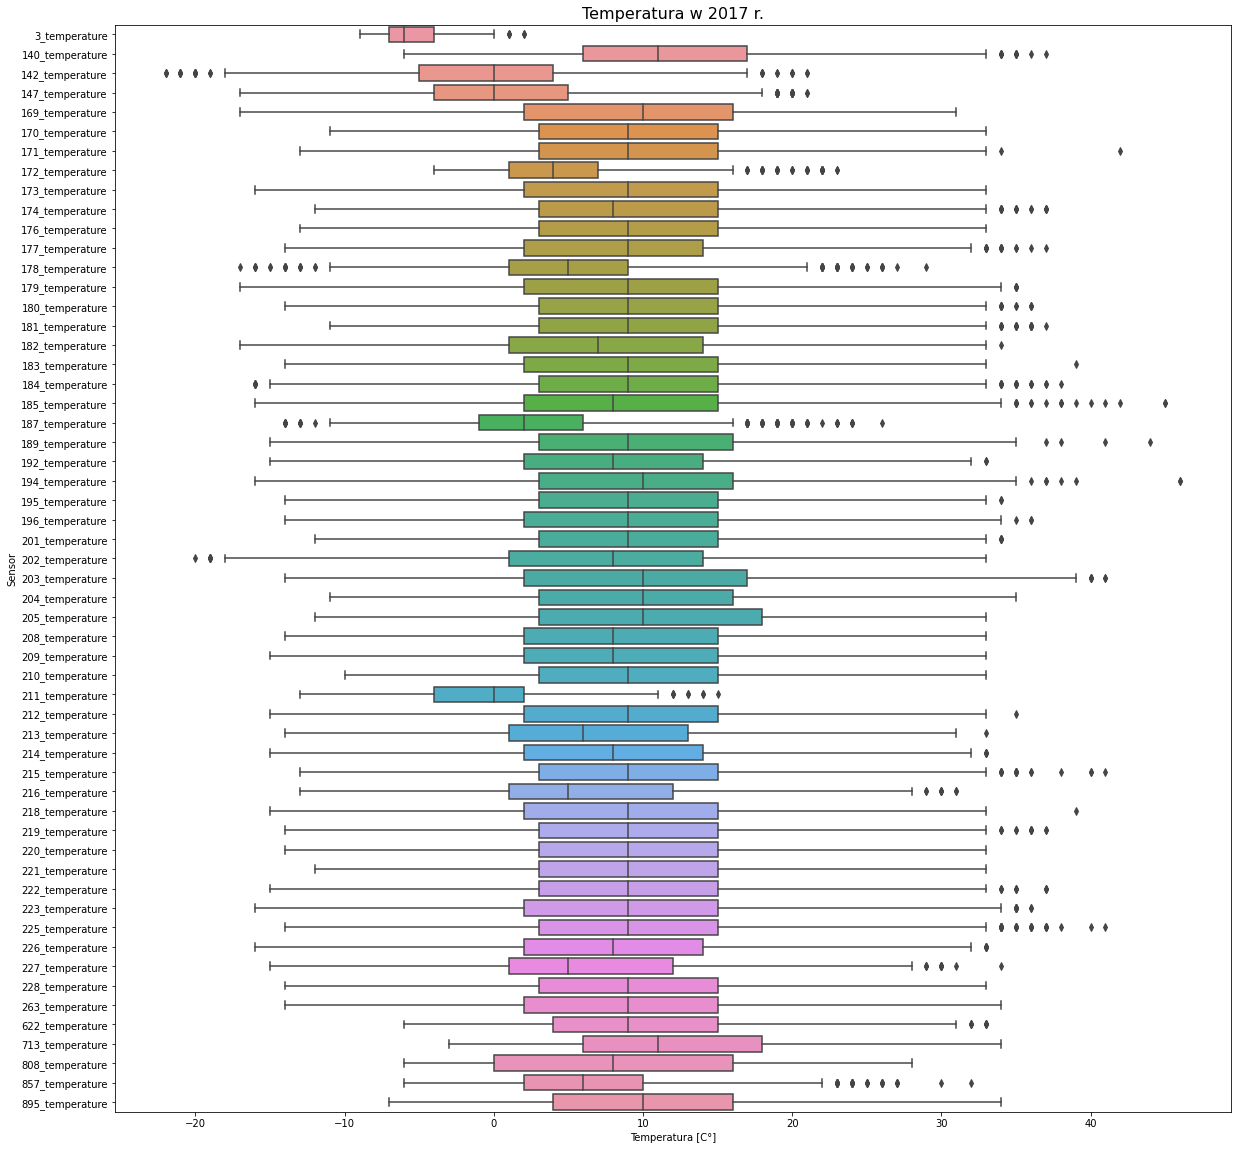

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=smog[temp_col], orient="h")
_ = plt.title("Temperatura w 2017 r.", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Temperatura [C°]")
_ = plt.show()

Na powyższym wykresie nie odnotowaliśmy znaczących błędów, a różnice w pomiarach miedzy czujnikami mogą wynikać z na przykład wysokiego nasłonecznienia lokalizacji danego sensora lub też jego częstego zacienienia.

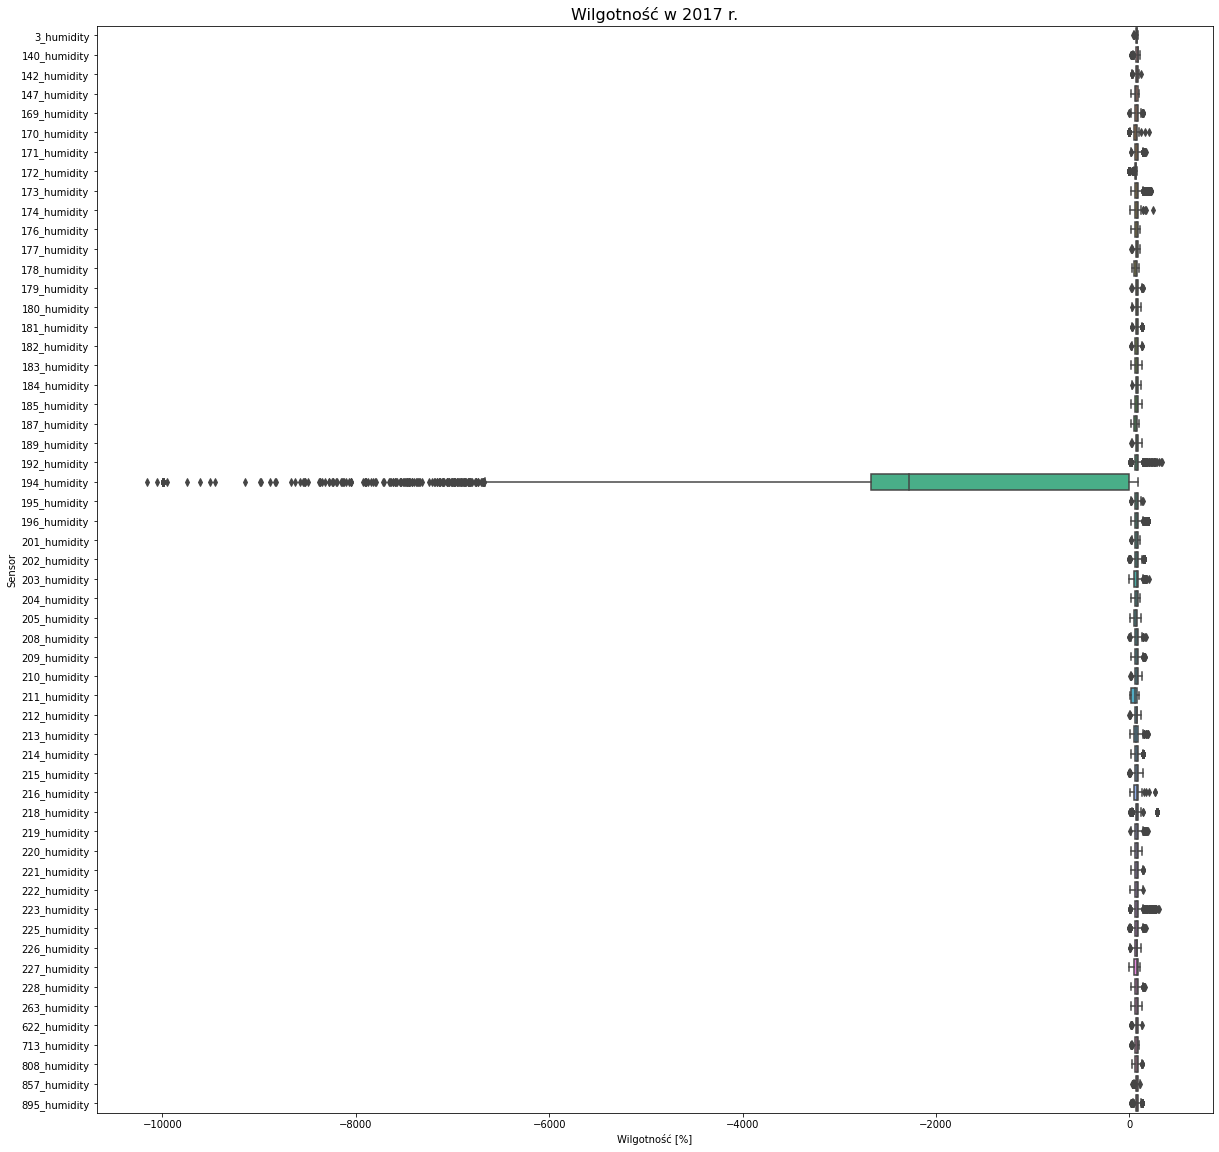

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=smog[humi_col], orient="h")
_ = plt.title("Wilgotność w 2017 r.", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Wilgotność [%]")
_ = plt.show()

Czujnik nr 194 zanotował odbiegajęce od reszty dane, więć postanowiliśmy go pominąć w dalszej częsci eksploracji.

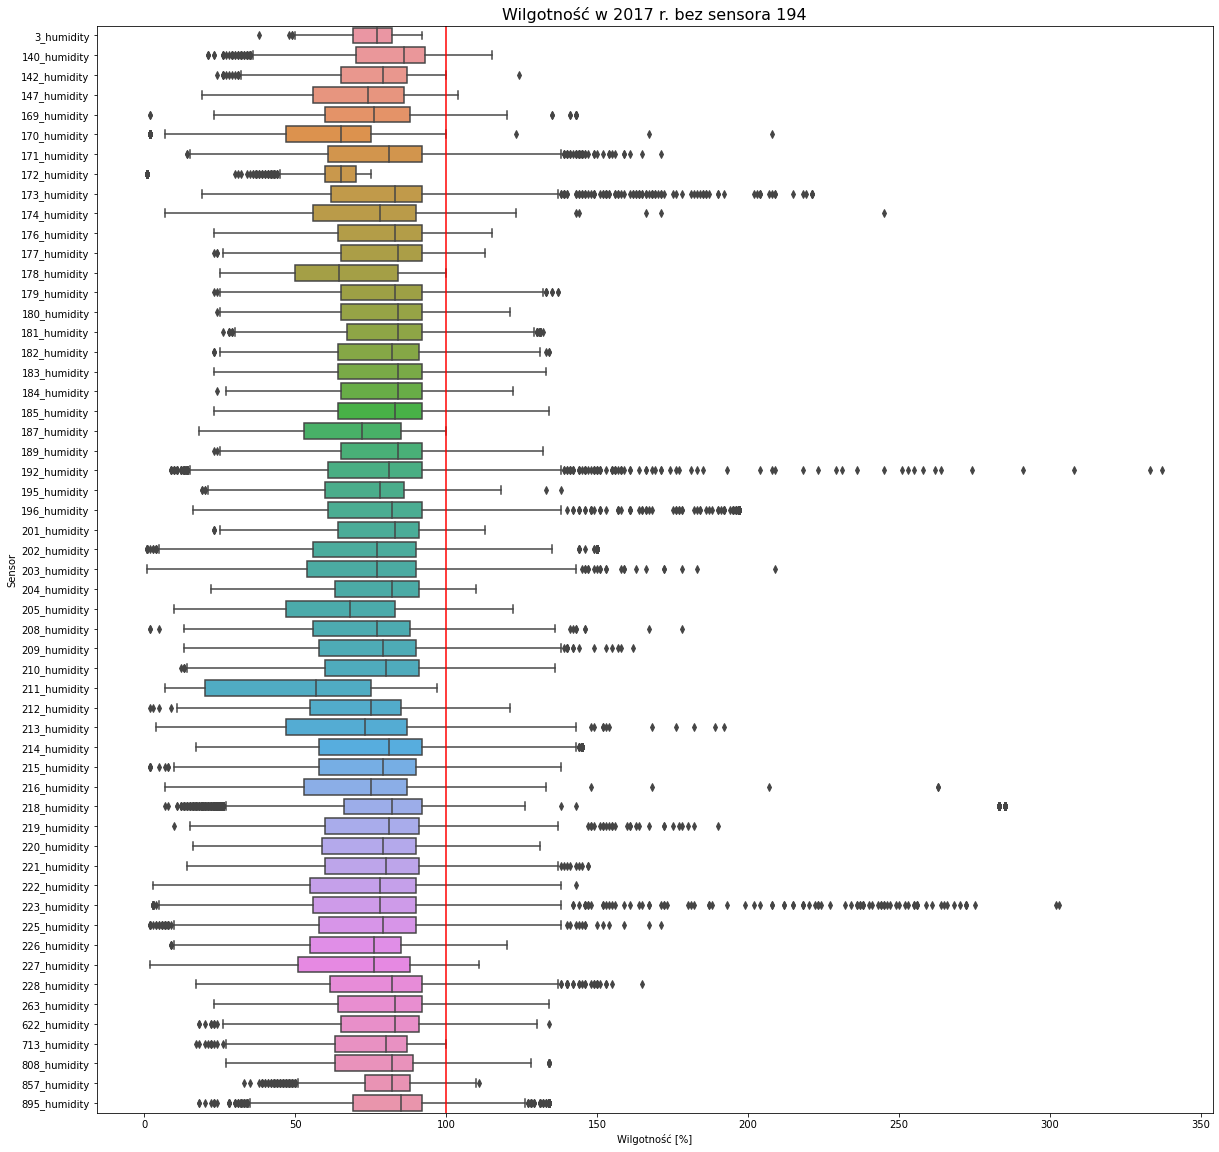

In [16]:
smog_humi_without194 = smog[humi_col].drop(columns = ["194_humidity"]) #Dropowanie pojedynczego czujnika

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=smog_humi_without194, orient="h")
_ = plt.title("Wilgotność w 2017 r. bez sensora 194", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Wilgotność [%]")
_ = plt.axvline(100, color="red") #Dorzucamy linię czerwoną aby widzieć max wilgotność dla powietrza
_ = plt.show()

Na wykresie powyżej widać sporo wartości powyżej 100%. Takich danych nie powinno tutaj być, gdyż wartosci powinny sie znaleźć w zakresie 0-100%, Postanowiliśmy te dane usunąć, ponieważ będą miały zły wpływ na korelacje.

In [17]:
def humi_correction(measurement):
    if measurement <0:
        return 50
    elif measurement > 100:
        return 50
    else: return measurement
    
smog_var_humi = humi_col[1:] #Wartości tabeli z wyłączeniem czasu
humi_corrected = smog[smog_var_humi].applymap(humi_correction) #Przyjmuje i zwraca wartość skalarną do każdego elementu 
time_df = pd.DataFrame(data=smog["UTC time"]) #Tabela wyłącznie z czasem
smog_humi_corrected = pd.concat([time_df, humi_corrected], axis=1) #Łącznie nowo powstałych DF
smog_corrected = pd.concat([smog_humi_corrected, smog[temp_col[1:]], smog[pres_col[1:]], smog[pm25_col[1:]], smog[pm10_col[1:]], smog[pm1_col[1:]]],axis=1) #Łącznie nowo powstałych DF

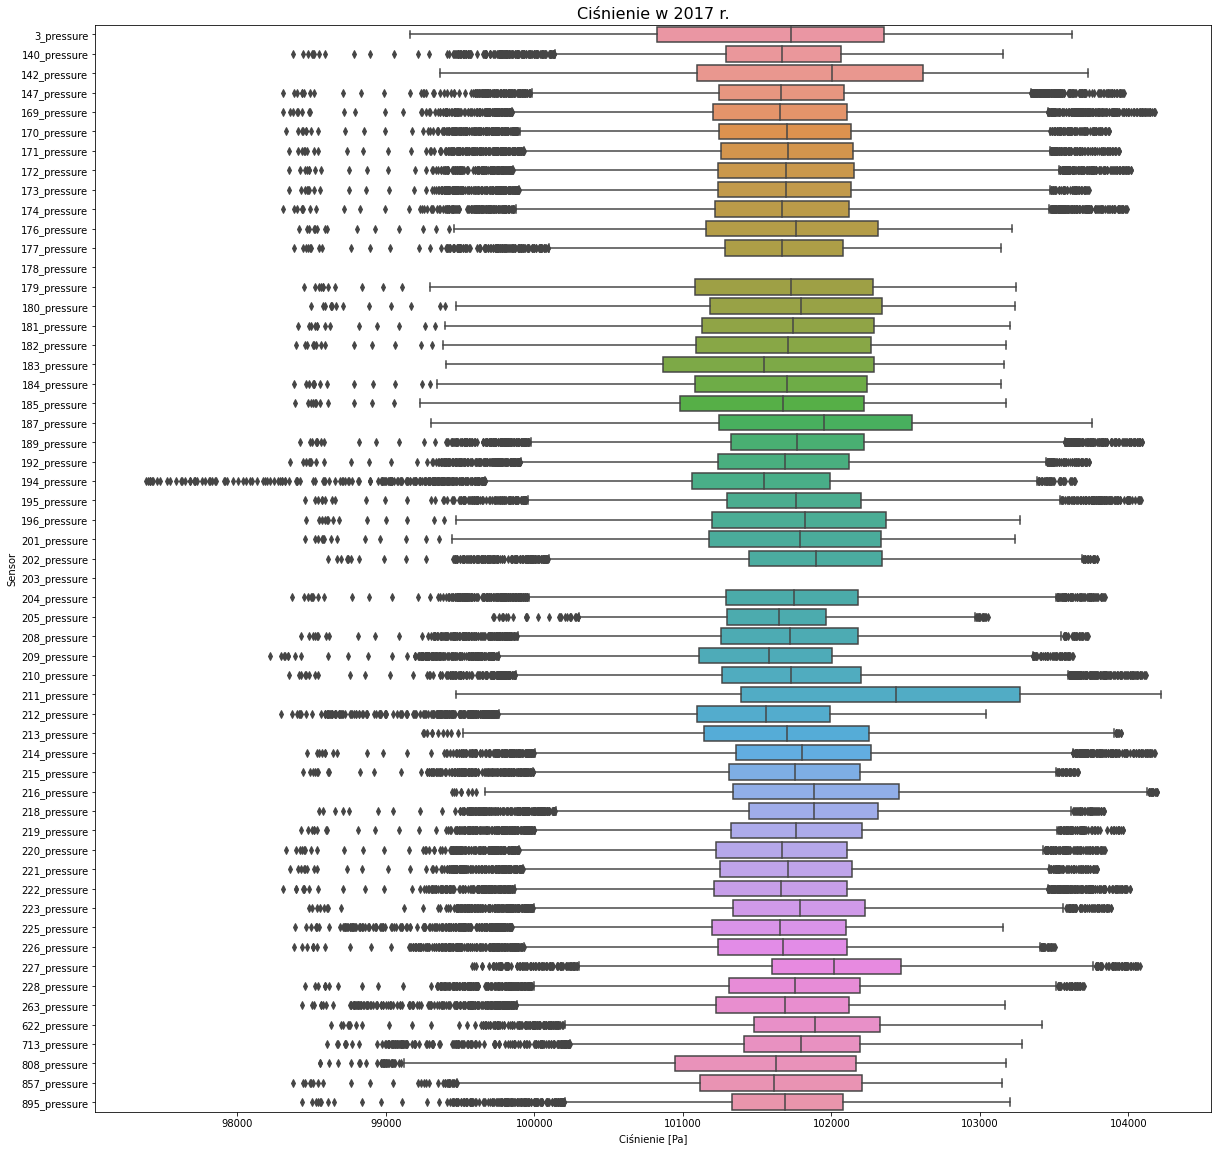

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=smog[pres_col], orient="h")
_ = plt.title("Ciśnienie w 2017 r.", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Ciśnienie [Pa]")
_ = plt.show()

Na powyższym wykresie widać, że czujniki numer 178 i 203 nie odnotowują pomiaru tej wartości, dlatego tez zostaną one usunięte.

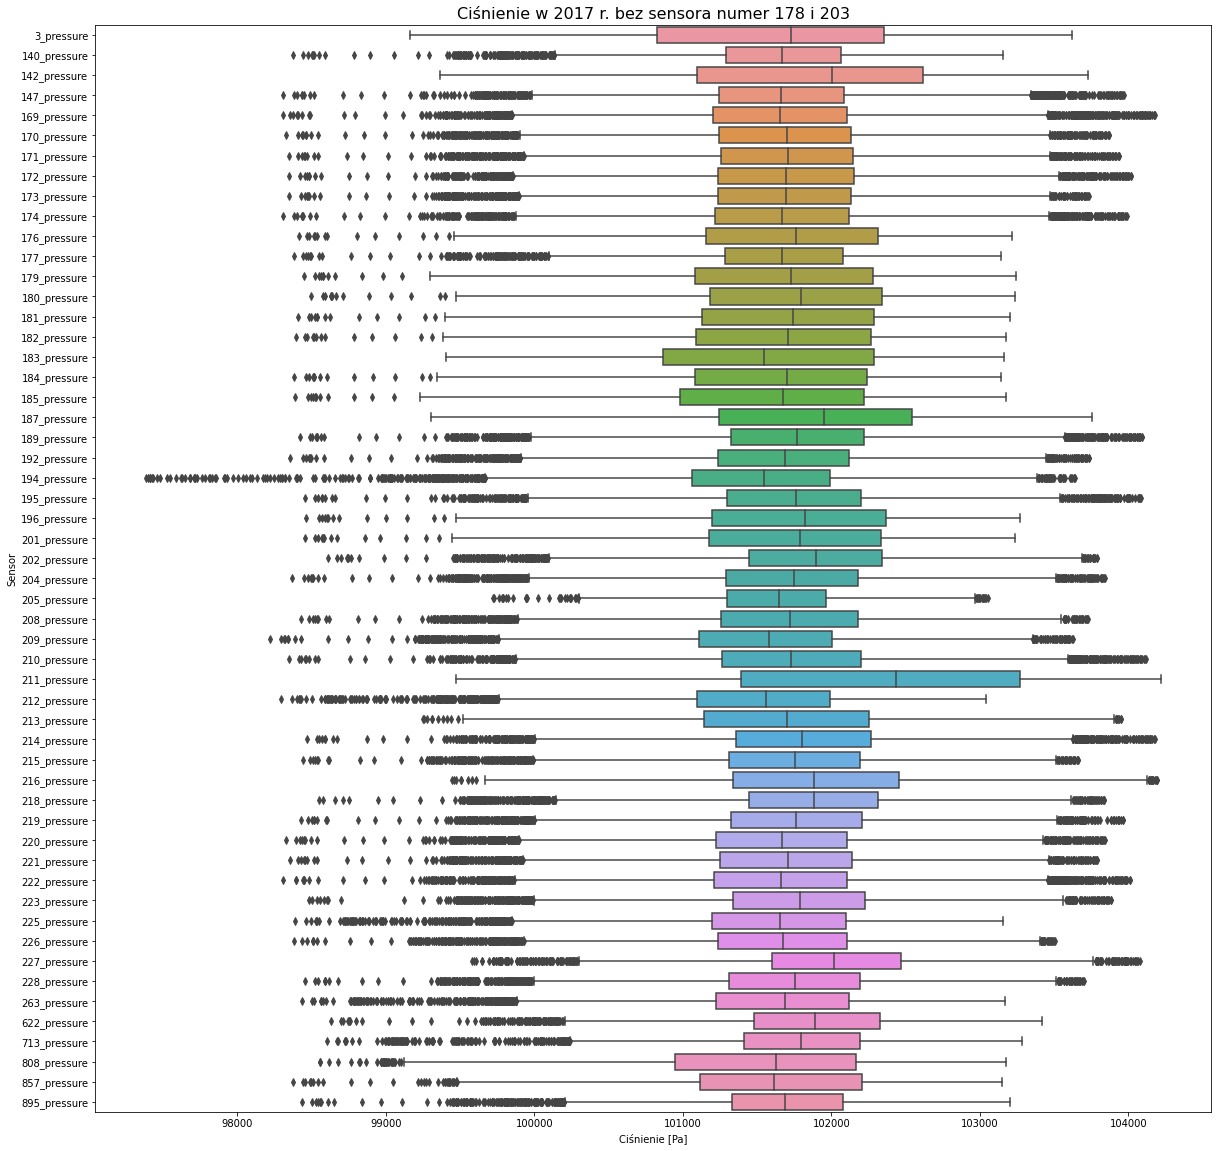

In [19]:
smog_pres_without_178_203 = smog[pres_col].drop(columns = ["178_pressure", "203_pressure"]) #Dropowanie czujników bez danych
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.boxplot(data=smog_pres_without_178_203, orient="h")
_ = plt.title("Ciśnienie w 2017 r. bez sensora numer 178 i 203", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Ciśnienie [Pa]")
_ = plt.show()

# **Pył zawieszony**

Czujniki, które znajdują się w zbiorze danych, posiadają wartości dla PM1, PM2,5 oraz dla PM10. Skrót PM pochodzi od ang. Particulate Matter są nimi drobne cząsteczki swobodnie unoszące się w powietrzu (stanowiące część tzw. aerozolu atmosferycznego). Mogą być pochodzenia naturalnego – np. pył mineralny, aerozol morski, popioły wulkaniczne itp., mogą również stanowić produkt działalności człowieka. Do tej grupy należą np. drobne cząsteczki sadzy powstające w procesie spalania węgla lub innych paliw, czy też cząsteczki pyłu wtórnego, powstające w wyniku przekształceń innych zanieczyszczeń obecnych w powietrzu, np. tlenków siarki i azotu.
Dobowa dopuszczalna wartość dla stężenia PM10 w Polsce to 50 µg/m3, natomiast roczna to 40µg/m3. W Unii Europejskiej roczne dopuszczalne stężenie to również 40µg/m3, lecz dopuszczalne przez WHO to już tylko 20µg/m3.
Dobowa wartość dopuszczalna dla PM25 to 25 µg/m3

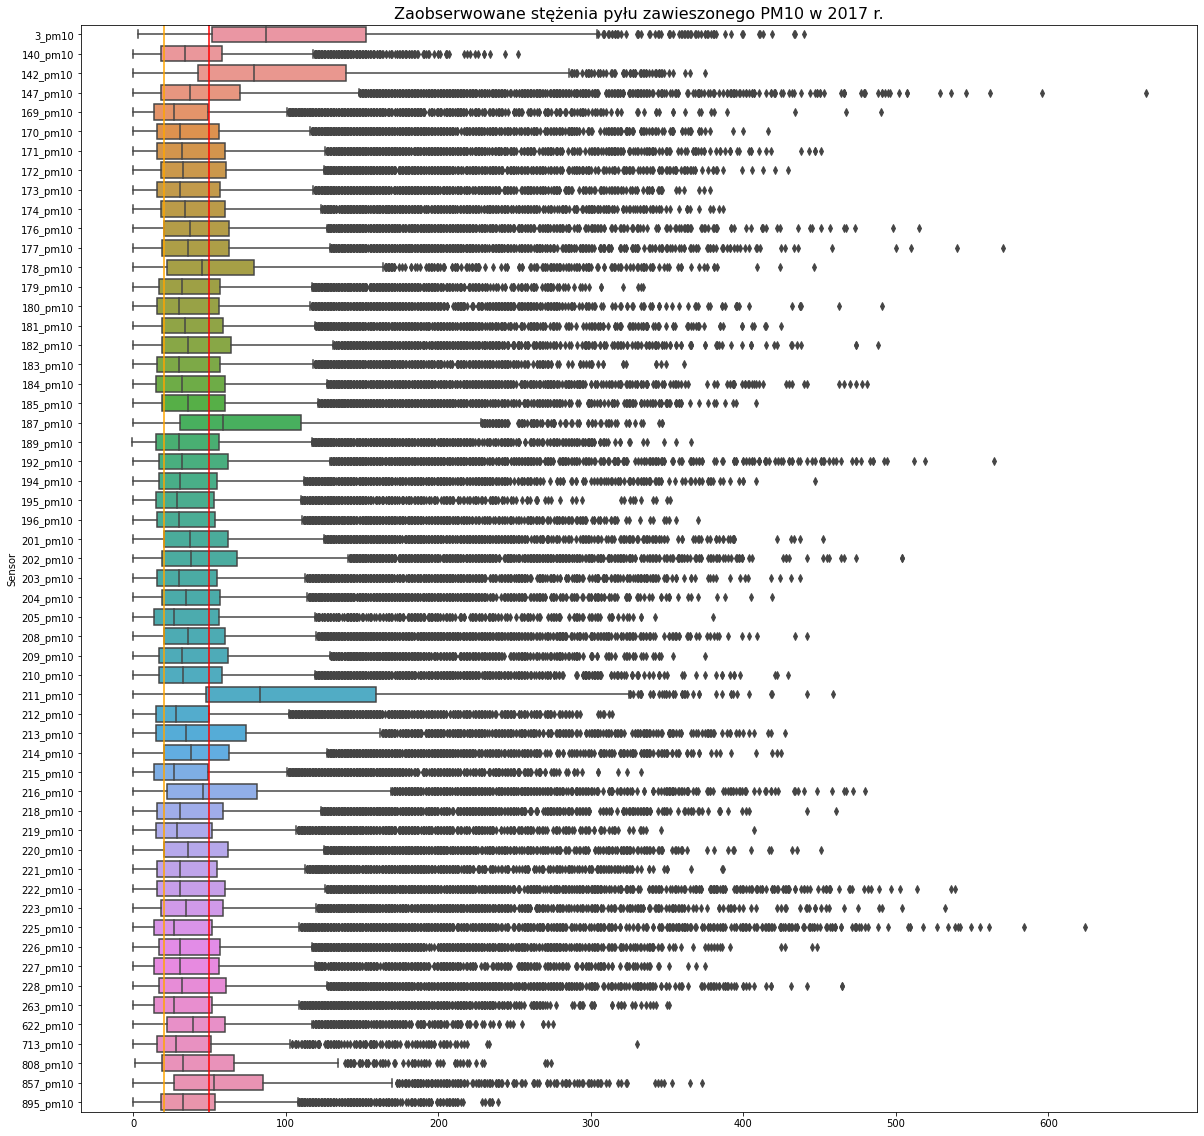

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=smog[pm10_col], orient="h")
_ = plt.title("Zaobserwowane stężenia pyłu zawieszonego PM10 w 2017 r.", fontsize=16)
_ = plt.axvline(20, color="orange")
_ = plt.axvline(50, color="red")
_ = plt.ylabel("Sensor")
_ = plt.show()

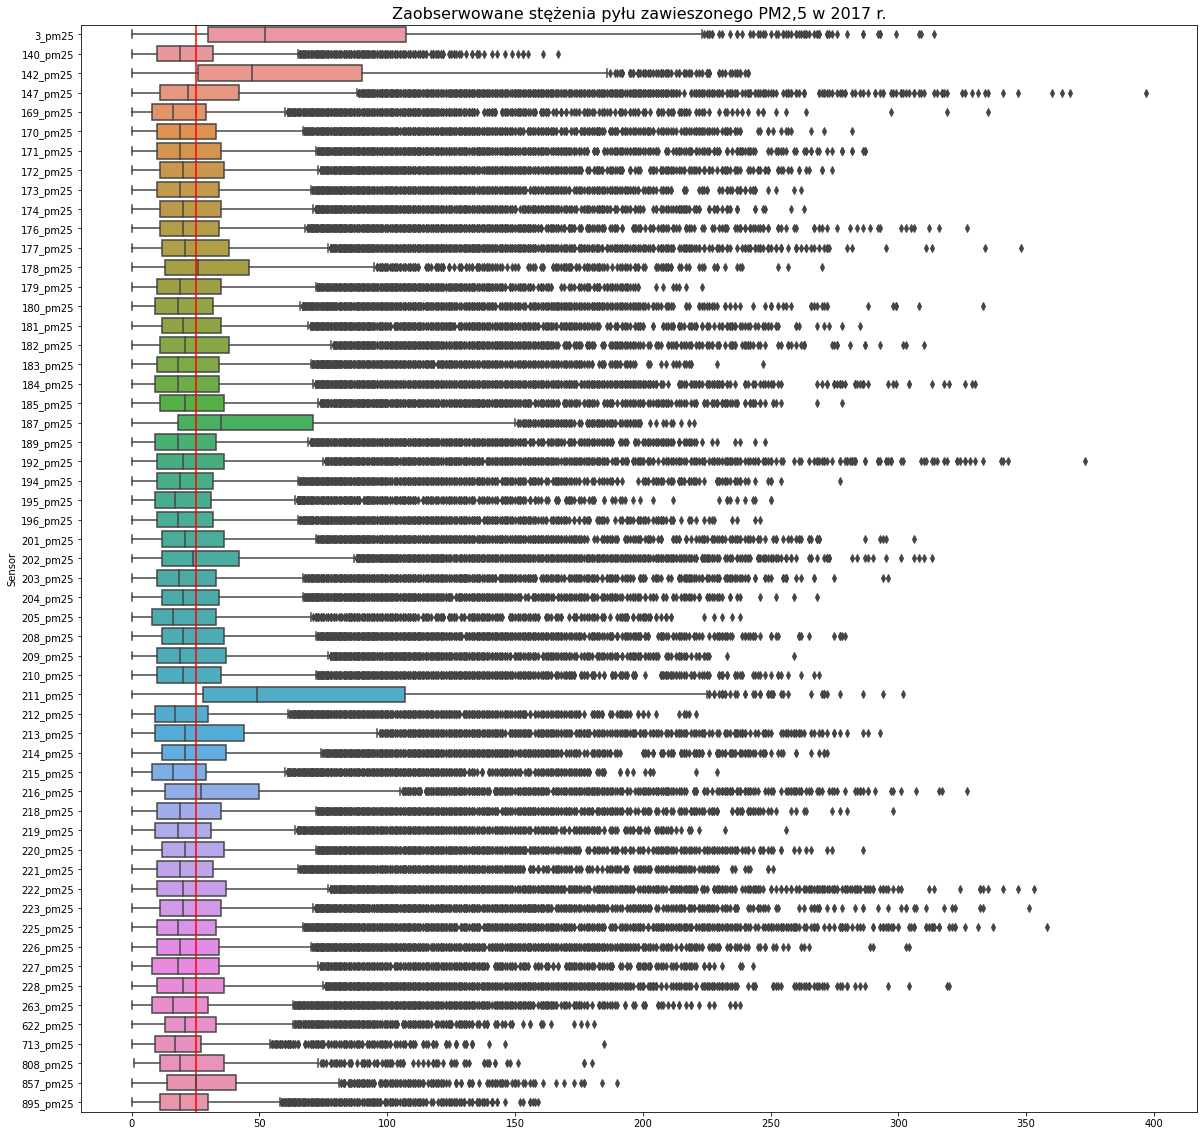

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=smog[pm25_col], orient="h")
_ = plt.title("Zaobserwowane stężenia pyłu zawieszonego PM2,5 w 2017 r.", fontsize=16)
_ = plt.axvline(25, color="red")
_ = plt.ylabel("Sensor")
_ = plt.show()

Na powyższych wykresach widać, że steżenie PM2,5 jest wielokrotnie przekraczane.

Wiemy, że smog wzmaga się zimową porą, lecz nie mamy wszystkich danych z dwóch pierwszych miesiecy jak i w grudniu także brakuje nam danych. Dlatego sprawdzimy jak wygląda średnie stężenie godzinowe PM10 w listopadzie.

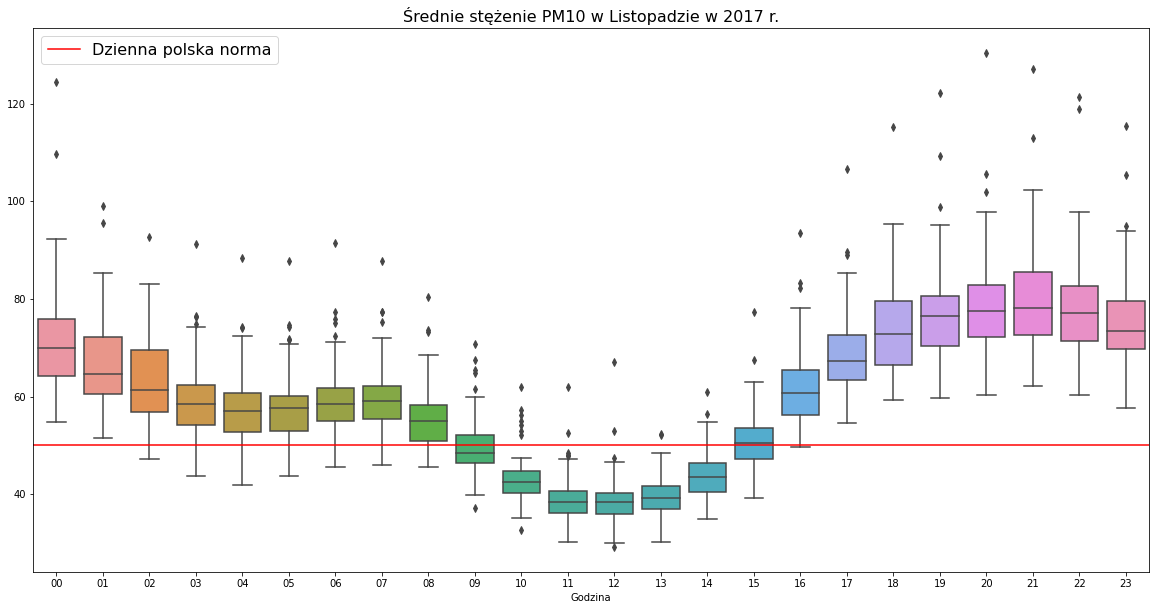

In [22]:
listopad1 = pd.read_csv("november-2017.csv")
listopad1["UTC time"] = pd.to_datetime(listopad1["UTC time"])
listopad_col_pm10 = [col for col in listopad1.columns if "pm10" in col or "UTC time" in col ]
listopad_pm10 = listopad1[listopad_col_pm10]
listopad1["UTC time"] = listopad1["UTC time"].dt.strftime("%H")
listopad_pm10_means = listopad1[listopad_col_pm10].groupby("UTC time").mean()
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(data=listopad_pm10_means.T)
_ = plt.title("Średnie stężenie PM10 w Listopadzie w 2017 r.", fontsize=16)
_ = plt.axhline(50, label = "Dzienna polska norma", color="red")
_ = plt.xlabel("Godzina")
_ = plt.legend(fontsize=16)
_ = plt.show()

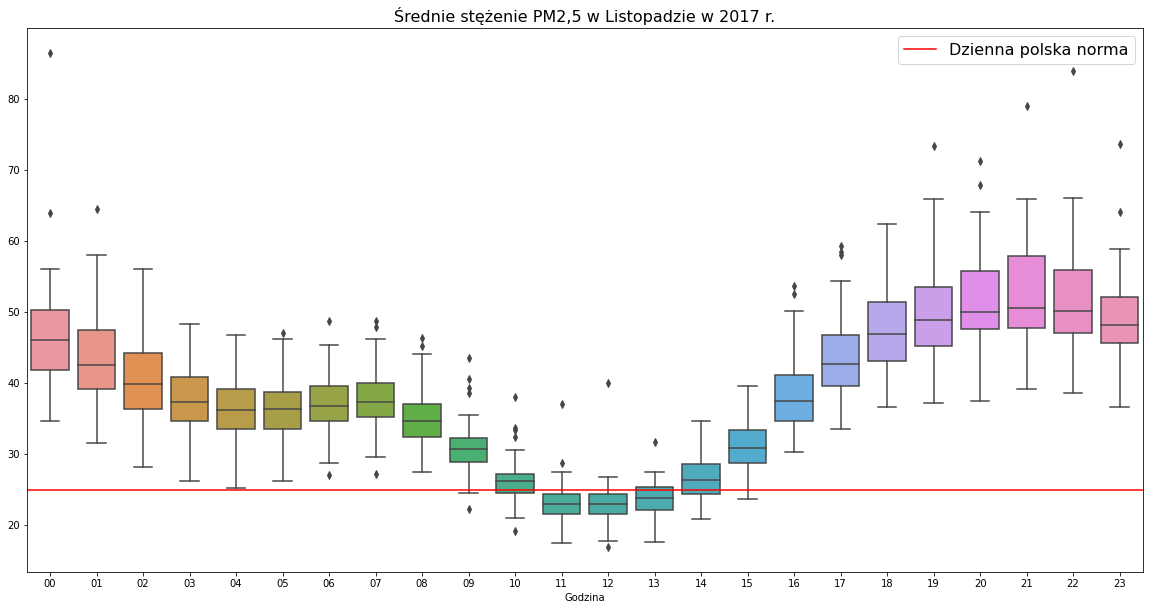

In [23]:
listopad1 = pd.read_csv("november-2017.csv")
listopad1["UTC time"] = pd.to_datetime(listopad1["UTC time"])
listopad_col_pm25 = [col for col in listopad1.columns if "pm25" in col or "UTC time" in col ]
listopad_pm25 = listopad1[listopad_col_pm25]
listopad1["UTC time"] = listopad1["UTC time"].dt.strftime("%H")
listopad_pm25_means = listopad1[listopad_col_pm25].groupby("UTC time").mean()
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(data=listopad_pm25_means.T)
_ = plt.title("Średnie stężenie PM2,5 w Listopadzie w 2017 r.", fontsize=16)
_ = plt.axhline(25, label = "Dzienna polska norma", color="red")
_ = plt.xlabel("Godzina")
_ = plt.legend(fontsize=16)
_ = plt.show()

Na powyższych wykresach widać wyraźnie wyższe steżenie obu pyłów w nocy, co w głównej mierze spowodowane jest niższą temperaturą, a co za tym idzie zwiększoną produkcją zanieczyszczeń pochodzacych z źródeł ogrzewania.

Dla porównania sprawdziliśmy także jakie wartości stężenia PM10 i PM2,5 występują w okresie letnim, wybierając do badania lipiec.

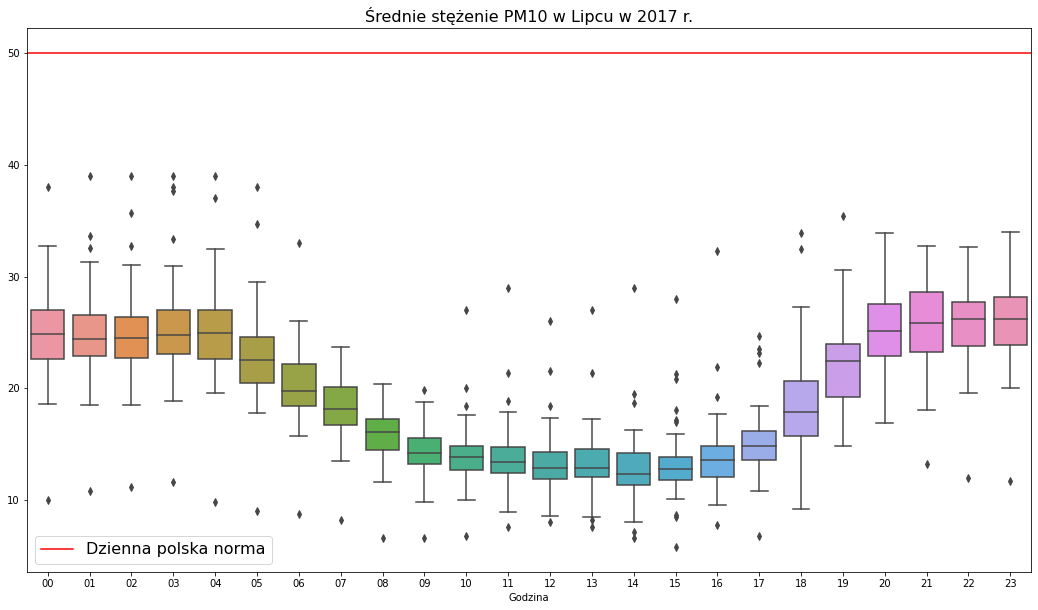

In [24]:
lipiec1 = pd.read_csv("july-2017.csv")
lipiec1["UTC time"] = pd.to_datetime(lipiec1["UTC time"])
lipiec_col_pm10 = [col for col in lipiec1.columns if "pm10" in col or "UTC time" in col ]
lipiec_pm10 = lipiec1[lipiec_col_pm10]
lipiec1["UTC time"] = lipiec1["UTC time"].dt.strftime("%H")
lipiec_pm10_means = lipiec1[lipiec_col_pm10].groupby("UTC time").mean()
lipiec_trans = lipiec_pm10_means.T
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot(data=lipiec_trans)
_ = plt.title("Średnie stężenie PM10 w Lipcu w 2017 r.", fontsize=16)
_ = plt.axhline(50, label = "Dzienna polska norma", color="red")
_ = plt.xlabel("Godzina")
_ = plt.legend(fontsize=16)
_ = plt.show()

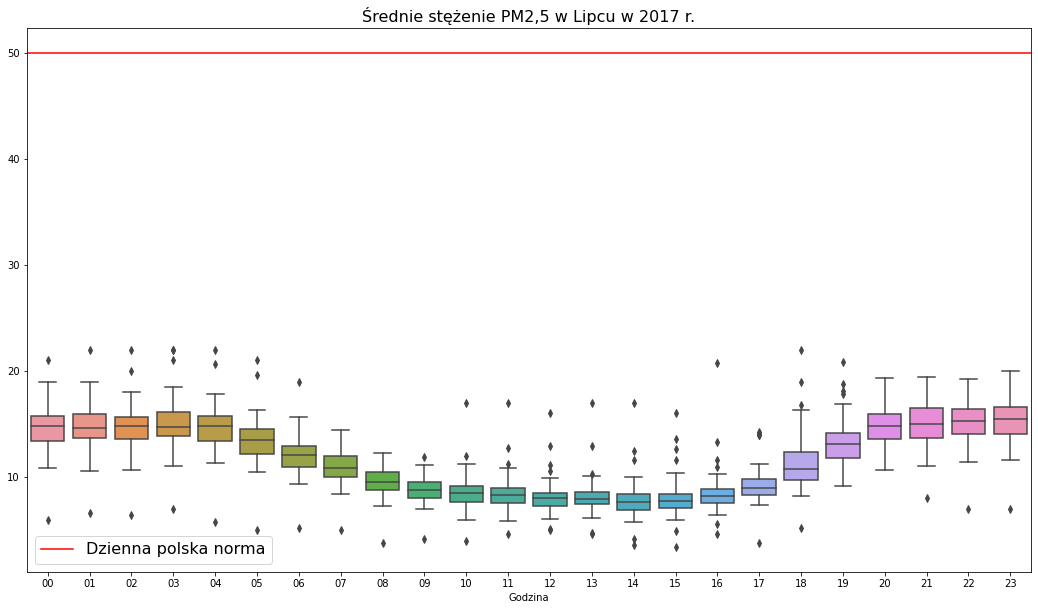

In [25]:
lipiec1 = pd.read_csv("july-2017.csv")
lipiec1["UTC time"] = pd.to_datetime(lipiec1["UTC time"])
lipiec_col_pm25 = [col for col in lipiec1.columns if "pm25" in col or "UTC time" in col ]
lipiec_pm25 = lipiec1[lipiec_col_pm25]
lipiec1["UTC time"] = lipiec1["UTC time"].dt.strftime("%H")
lipiec_pm25_means = lipiec1[lipiec_col_pm25].groupby("UTC time").mean()
lipiec_trans = lipiec_pm25_means.T
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot(data=lipiec_trans)
_ = plt.title("Średnie stężenie PM2,5 w Lipcu w 2017 r.", fontsize=16)
_ = plt.axhline(50, label = "Dzienna polska norma", color="red")
_ = plt.xlabel("Godzina")
_ = plt.legend(fontsize=16)
_ = plt.show()

Dla obu wartości stężenia pyłów PM10 i PM2,5 wyraźnie widać, że wartości są znacznie poniżej norm.

# **Zależność wartości stężenia pyłów w czasie**

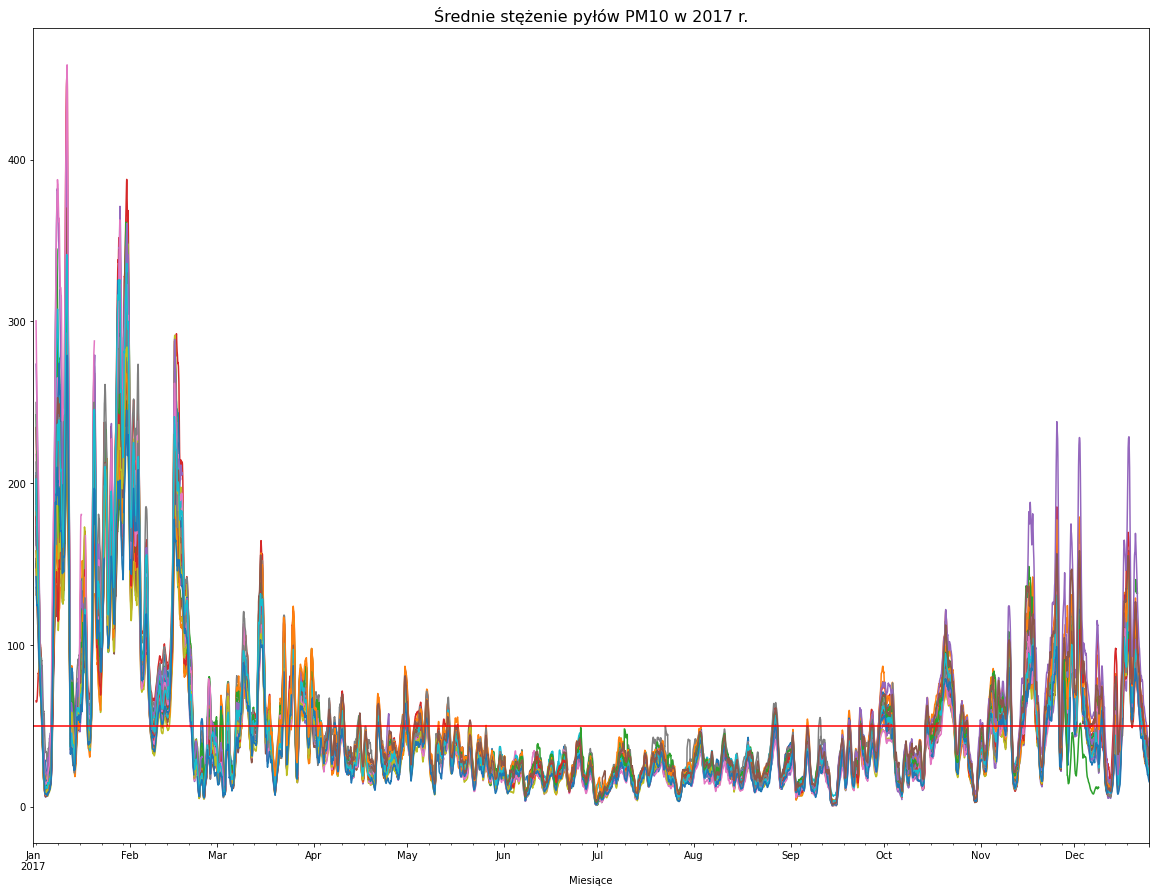

In [26]:
smog["UTC time"] = pd.to_datetime(smog["UTC time"]) #Normalizacja formatu czasu
smog = smog.sort_values(by=["UTC time"], ascending=True) #Sortowanie wartości DF po "UTC time"
smog_pm10 = smog[pm10_col].set_index("UTC time") #Ustawienie wartości "UTC time" jako index DF
moving_average_smog10 = smog_pm10.rolling(window=24).mean()

ax = moving_average_smog10.plot(figsize =(20,15), legend=None)
_ = ax.set_xlabel("Miesiące")
_ = plt.title("Średnie stężenie pyłów PM10 w 2017 r.", fontsize =16)
ax = plt.axhline(50, label = "Dzienna norma wg WHO", color="red")
_ = plt.show()

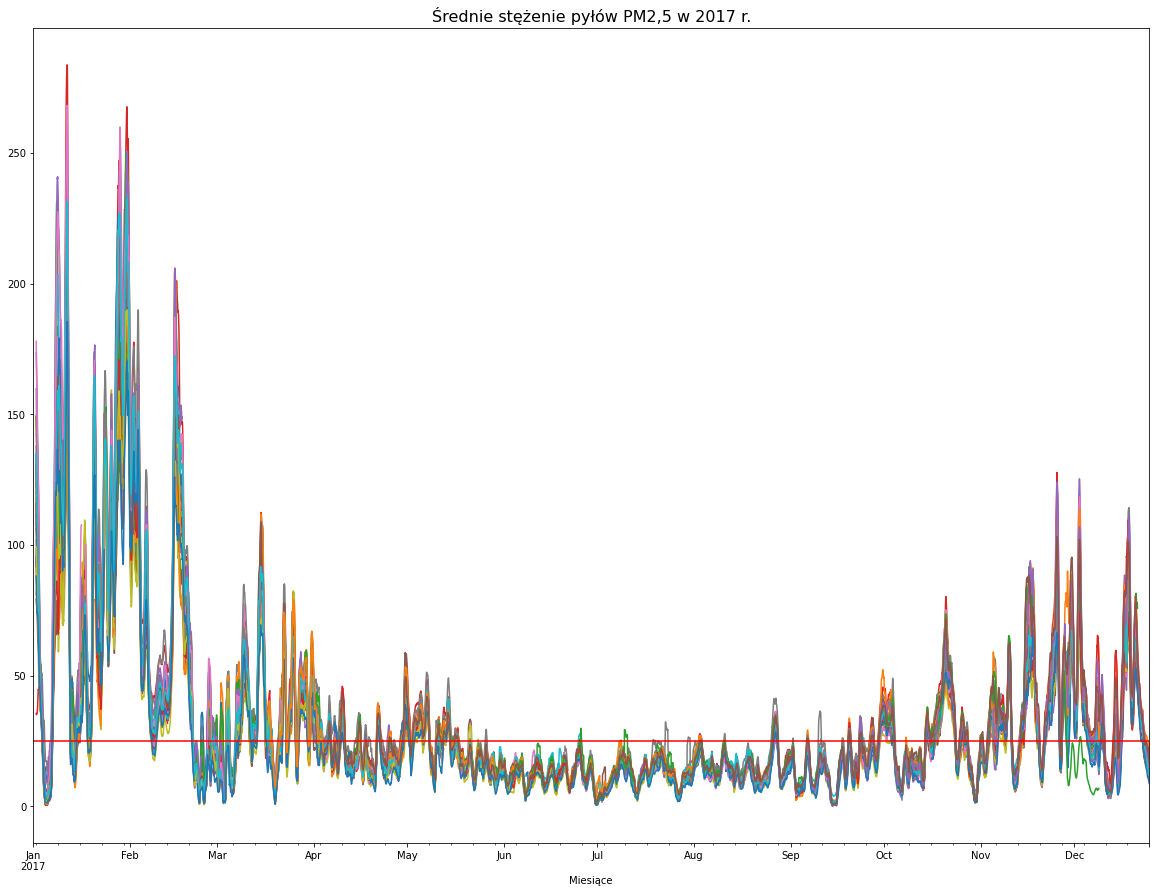

In [27]:
smog_pm25 = smog[pm25_col].set_index("UTC time")
moving_average_smog25 = smog_pm25.rolling(window=24).mean()

ax = moving_average_smog25.plot(figsize =(20,15), legend=None)
_ = ax.set_xlabel("Miesiące")
_ = plt.title("Średnie stężenie pyłów PM2,5 w 2017 r.", fontsize =16)
ax = plt.axhline(25, label = "Dzienna norma wg WHO", color="red")
_ = plt.show()

Powyższe wykresy również potwierdzają, że stężenie mierzonych pyłów zawieszonych jest najwyższe w okrisie zimowym.

# **Dalsze czyszczenie kodu**

In [28]:
smog_corrected

,UTC time,3_humidity,140_humidity,142_humidity,147_humidity,169_humidity,170_humidity,171_humidity,172_humidity,173_humidity,...,225_pm1,226_pm1,227_pm1,228_pm1,263_pm1,622_pm1,713_pm1,808_pm1,857_pm1,895_pm1
0,2017-04-01T00:00:00,NaN,92.0,NaN,NaN,89.0,88.0,91.0,NaN,92.0,...,58.0,32.0,55.0,52.0,45.0,50.0,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,92.0,NaN,NaN,89.0,88.0,91.0,NaN,92.0,...,56.0,29.0,59.0,34.0,31.0,54.0,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,94.0,NaN,NaN,91.0,91.0,94.0,NaN,94.0,...,53.0,24.0,57.0,31.0,29.0,59.0,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,92.0,NaN,NaN,88.0,87.0,91.0,NaN,NaN,...,51.0,23.0,54.0,35.0,31.0,59.0,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,94.0,NaN,NaN,91.0,91.0,93.0,NaN,NaN,...,47.0,26.0,50.0,40.0,33.0,61.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,2017-09-30T19:00:00,NaN,83.0,NaN,NaN,64.0,59.0,81.0,NaN,83.0,...,31.0,40.0,NaN,37.0,43.0,51.0,34.0,NaN,35.0,37.0
8645,2017-09-30T20:00:00,NaN,83.0,NaN,NaN,60.0,59.0,83.0,NaN,83.0,...,31.0,39.0,NaN,36.0,44.0,48.0,33.0,NaN,36.0,37.0
8646,2017-09-30T21:00:00,NaN,90.0,NaN,NaN,66.0,65.0,90.0,NaN,90.0,...,31.0,40.0,NaN,35.0,43.0,53.0,35.0,NaN,38.0,45.0
8647,2017-09-30T22:00:00,NaN,88.0,NaN,NaN,88.0,63.0,88.0,NaN,88.0,...,33.0,43.0,NaN,38.0,40.0,51.0,37.0,NaN,44.0,46.0


In [29]:
smog_corrected = smog_corrected.sort_values(by=['UTC time'], ascending=True) #Sortowanie według czasu
smog_corrected = smog_corrected.dropna(how='all') #Dropowanie wiwrszy, gdzie wszystkie wartości są wartościami NaN
smog_corrected['UTC time'] = pd.to_datetime(smog_corrected['UTC time']).dt.normalize() #Normalizacja formatu czasu

In [30]:
smog_corrected = pd.melt(smog_corrected, id_vars=['UTC time'])
smog_corrected

,UTC time,variable,value
0,2017-01-01,3_humidity,NaN
1,2017-01-01,3_humidity,NaN
2,2017-01-01,3_humidity,NaN
3,2017-01-01,3_humidity,NaN
4,2017-01-01,3_humidity,NaN
...,...,...,...
2887243,2017-12-24,895_pm1,13.0
2887244,2017-12-24,895_pm1,12.0
2887245,2017-12-24,895_pm1,10.0
2887246,2017-12-24,895_pm1,10.0


In [31]:
smog_corrected['variable'] = smog_corrected['variable'].str.split("_")
smog_corrected[['sensor_id', 'var']] = smog_corrected.variable.to_list() #Konwersja zbioru na listę
smog_corrected.drop(columns='variable', inplace=True)

In [32]:
smog_corrected = smog_corrected.groupby(by=['UTC time', 'sensor_id', 'var'])['value'].median().reset_index()
smog_corrected = smog_corrected.pivot(index=['UTC time', 'sensor_id'], columns=['var'], values=['value'])

In [33]:
smog_corrected.columns = smog_corrected.columns.get_level_values(1)
smog_corrected = smog_corrected.reset_index().sort_values(by=['UTC time', 'sensor_id'])

In [34]:
smog_corrected['temperature'] = smog_corrected['temperature'].fillna(smog_corrected.groupby('UTC time')['temperature'].transform('median')) #Uzupełnianie wartości Nan dla temperatury medianą

In [35]:
smog_corrected['humidity'] = smog_corrected['humidity'].fillna(smog_corrected.groupby('UTC time')['humidity'].transform('median')) #Uzupełnianie wartości Nan dla wilgotności medianą

In [36]:
smog_corrected['pressure'] = smog_corrected['pressure'].fillna(smog_corrected.groupby('UTC time')['pressure'].transform('median')) #Uzupełnianie wartości Nan dla ciśnienia medianą

In [37]:
smog_dane = smog_corrected.dropna(subset=['pm1', 'pm10', 'pm25']) #Dropowanie wartości NaN dla poszczególnych czujników

# **Badanie korelacji zmiennych**

<Figure size 2160x2160 with 0 Axes>

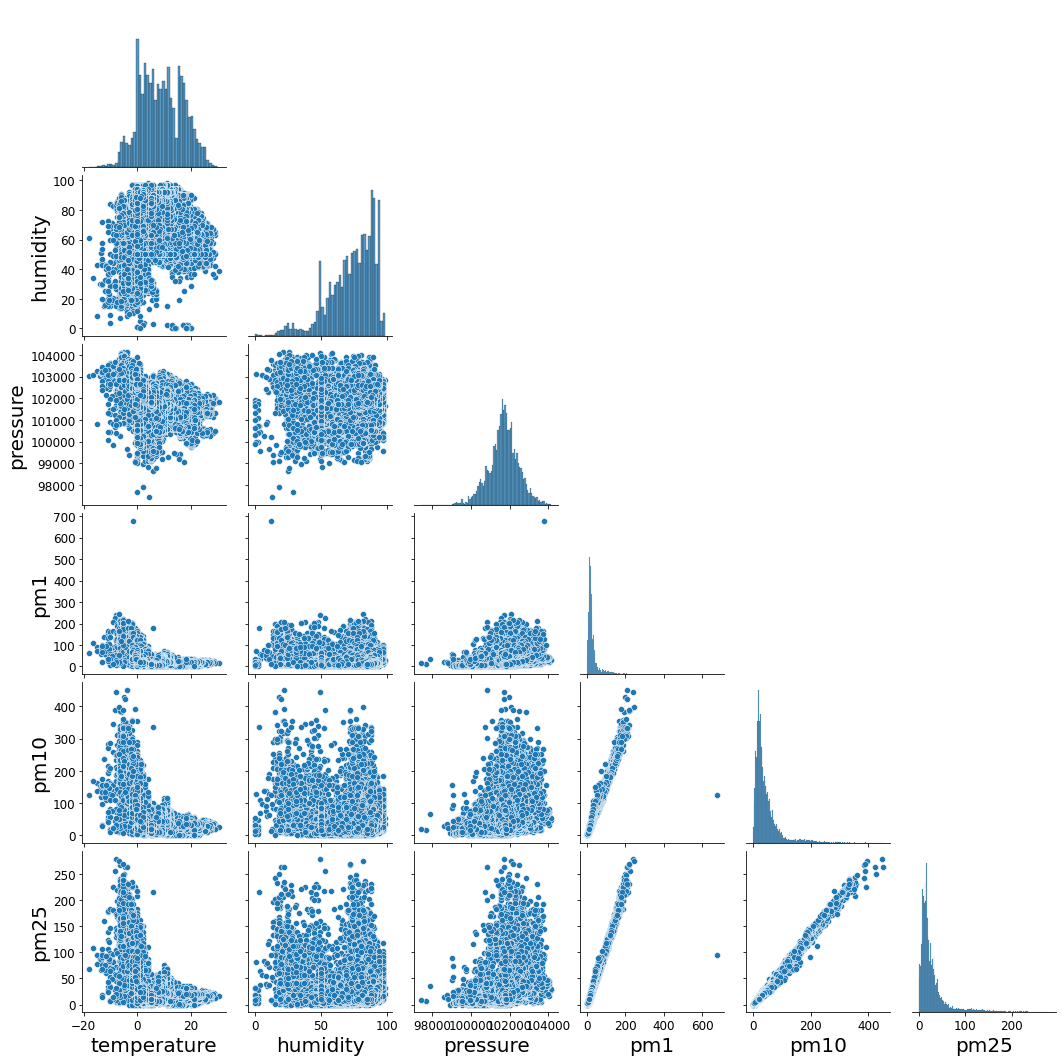

In [38]:
plt.figure(figsize=(30,30))
with sns.plotting_context(rc={"axes.labelsize":20,
                              "xtick.labelsize": 12,
                              "ytick.labelsize": 12,}):
  sns.pairplot(data=smog_dane[["temperature","humidity","pressure", "pm1", "pm10", "pm25"]], corner=True, markers=["o", "s"], palette="Set1")
plt.show()

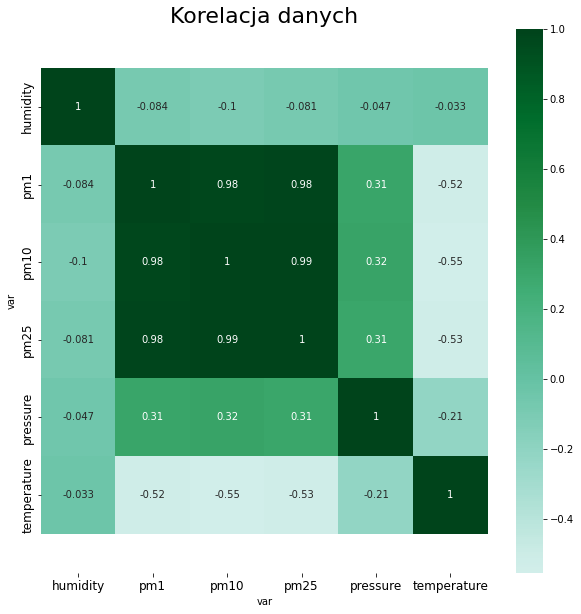

In [39]:
def print_corelogram(X,size):
  plt.figure(figsize=size)
  ax = sns.heatmap(X.corr(), 
                  xticklabels=X.corr().columns, 
                  yticklabels=X.corr().columns, 
                  cmap='BuGn', 
                  center=0, 
                  annot=True)

  plt.title("Korelacja danych", fontsize=22)
  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()
print_corelogram(smog_dane,size=(10, 10))

Dzięki powyższym korelacjom mogliśmy wywnioskować, że im wyższa temperatura, tym lepsza jest jakość powietrza. Ciśnienie wykazuje pewien pozytywny stopień korelacji - im wyższe, tym też wzrasta stężenie pyłu, zwłaszcza tego o większej średnicy. Istnieje słaba ujemna korelacja między zmiennymi zanieczyszczeń, a wilgotnością.

# **Dodanie kolejnego czynnika do danych**

W związku, że wiatr jest dużym czynnikiem wpływającym na obecność i ilość smogu użyliśmy WebPlotDigitiyer do uzyskania prędkości wiatru z 2017 r. z https://pl.weatherspark.com/h/y/148444/2017/Historyczne-warunki-pogodowe-w-roku-2017-na-Krak%C3%B3w-Airport-im.-Jana-Paw%C5%82a-II-Polska#Figures-WindDirection

In [40]:
wind = pd.read_csv("Default Dataset.csv") #Wczytanie przygotowannych danych odnośnie waitru
wind["UTC time"] = pd.date_range(start="1/1/2017", periods=len(wind), freq="D")
wind

,DZIEN,PREDKOSC,UTC time
0,2016/12/29,15.254237,2017-01-01
1,2016/12/28,33.898305,2017-01-02
2,2016/12/28,41.525424,2017-01-03
3,2016/12/28,44.915254,2017-01-04
4,2017/01/01,30.508475,2017-01-05
...,...,...,...
360,2017/12/24,16.101695,2017-12-27
361,2017/12/25,21.186441,2017-12-28
362,2017/12/27,16.101695,2017-12-29
363,2017/12/29,8.474576,2017-12-30


In [41]:
wind = wind.drop(index=0, axis=1)
wind

,DZIEN,PREDKOSC,UTC time
1,2016/12/28,33.898305,2017-01-02
2,2016/12/28,41.525424,2017-01-03
3,2016/12/28,44.915254,2017-01-04
4,2017/01/01,30.508475,2017-01-05
5,2017/01/02,21.186441,2017-01-06
...,...,...,...
360,2017/12/24,16.101695,2017-12-27
361,2017/12/25,21.186441,2017-12-28
362,2017/12/27,16.101695,2017-12-29
363,2017/12/29,8.474576,2017-12-30


Dodanie DF dotyczącego wiatru, do wcześniej opracowywanych danych.

In [42]:
smog_data = pd.merge(smog_dane, wind, on="UTC time") #Połączenie DF z wiatrem z pozostałymi
smog_data

,UTC time,sensor_id,humidity,pm1,pm10,pm25,pressure,temperature,DZIEN,PREDKOSC
0,2017-01-02,142,70.0,57.0,111.5,61.5,101162.0,-4.0,2016/12/28,33.898305
1,2017-01-02,147,53.0,59.5,112.5,61.5,101379.5,-2.0,2016/12/28,33.898305
2,2017-01-02,169,48.0,40.0,80.5,41.5,101559.0,5.0,2016/12/28,33.898305
3,2017-01-02,170,24.0,44.0,91.5,47.5,101252.0,4.0,2016/12/28,33.898305
4,2017-01-02,171,27.0,49.5,97.0,53.0,101313.5,3.0,2016/12/28,33.898305
...,...,...,...,...,...,...,...,...,...,...
16583,2017-12-25,263,85.0,4.0,8.0,4.0,101807.0,5.0,2017/12/20,33.050847
16584,2017-12-25,622,88.0,10.0,18.0,10.0,102040.0,5.0,2017/12/20,33.050847
16585,2017-12-25,808,86.0,10.0,21.0,11.0,101801.0,5.0,2017/12/20,33.050847
16586,2017-12-25,857,78.0,10.0,23.0,11.0,101774.0,5.0,2017/12/20,33.050847


In [43]:
smog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16588 entries, 0 to 16587
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   UTC time     16588 non-null  datetime64[ns]
 1   sensor_id    16588 non-null  object        
 2   humidity     16588 non-null  float64       
 3   pm1          16588 non-null  float64       
 4   pm10         16588 non-null  float64       
 5   pm25         16588 non-null  float64       
 6   pressure     16588 non-null  float64       
 7   temperature  16588 non-null  float64       
 8   DZIEN        16588 non-null  object        
 9    PREDKOSC    16588 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 1.4+ MB


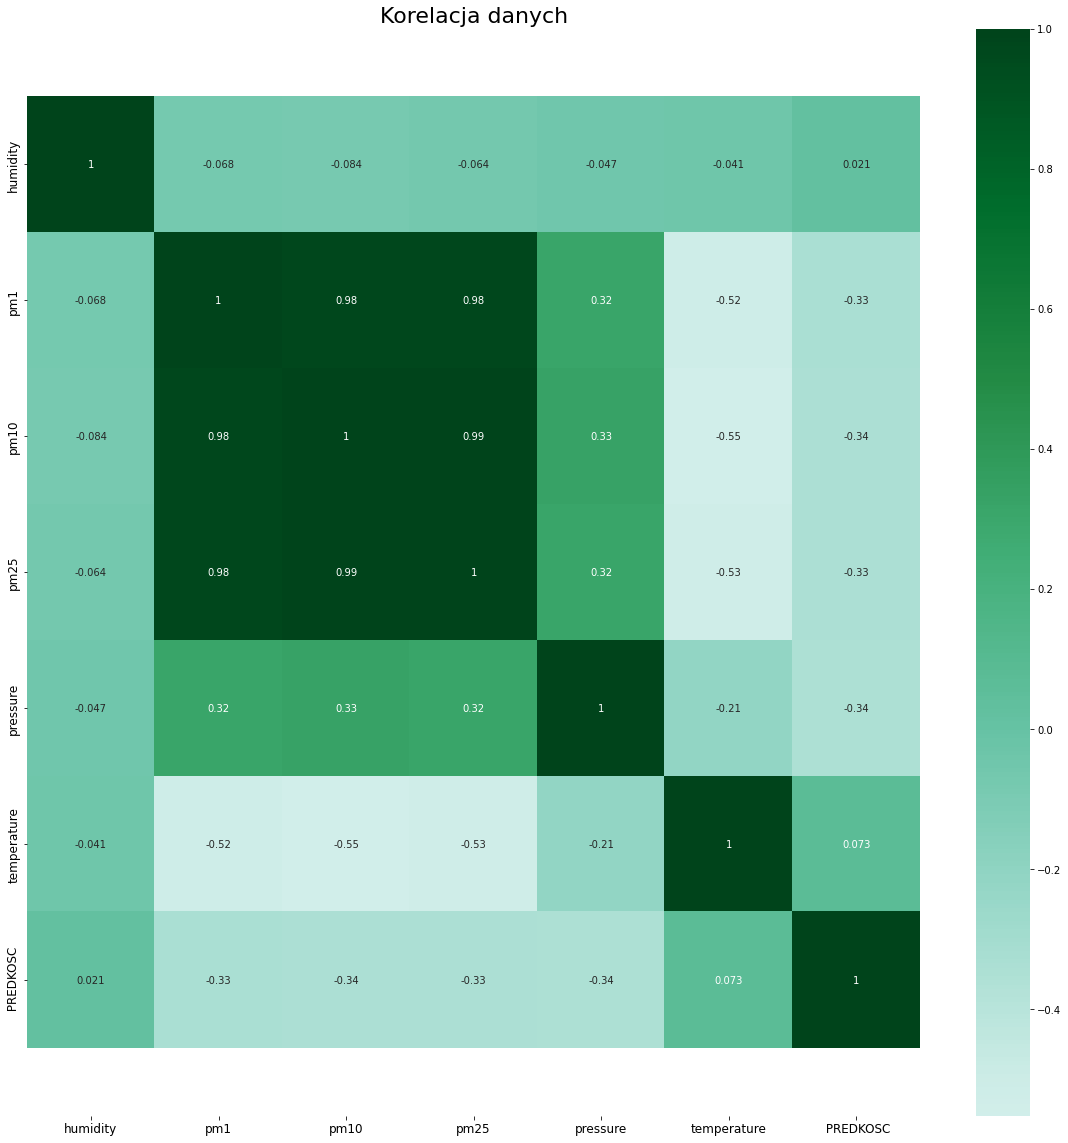

In [44]:
print_corelogram(smog_data,size=(20, 20))

<Figure size 2592x2592 with 0 Axes>

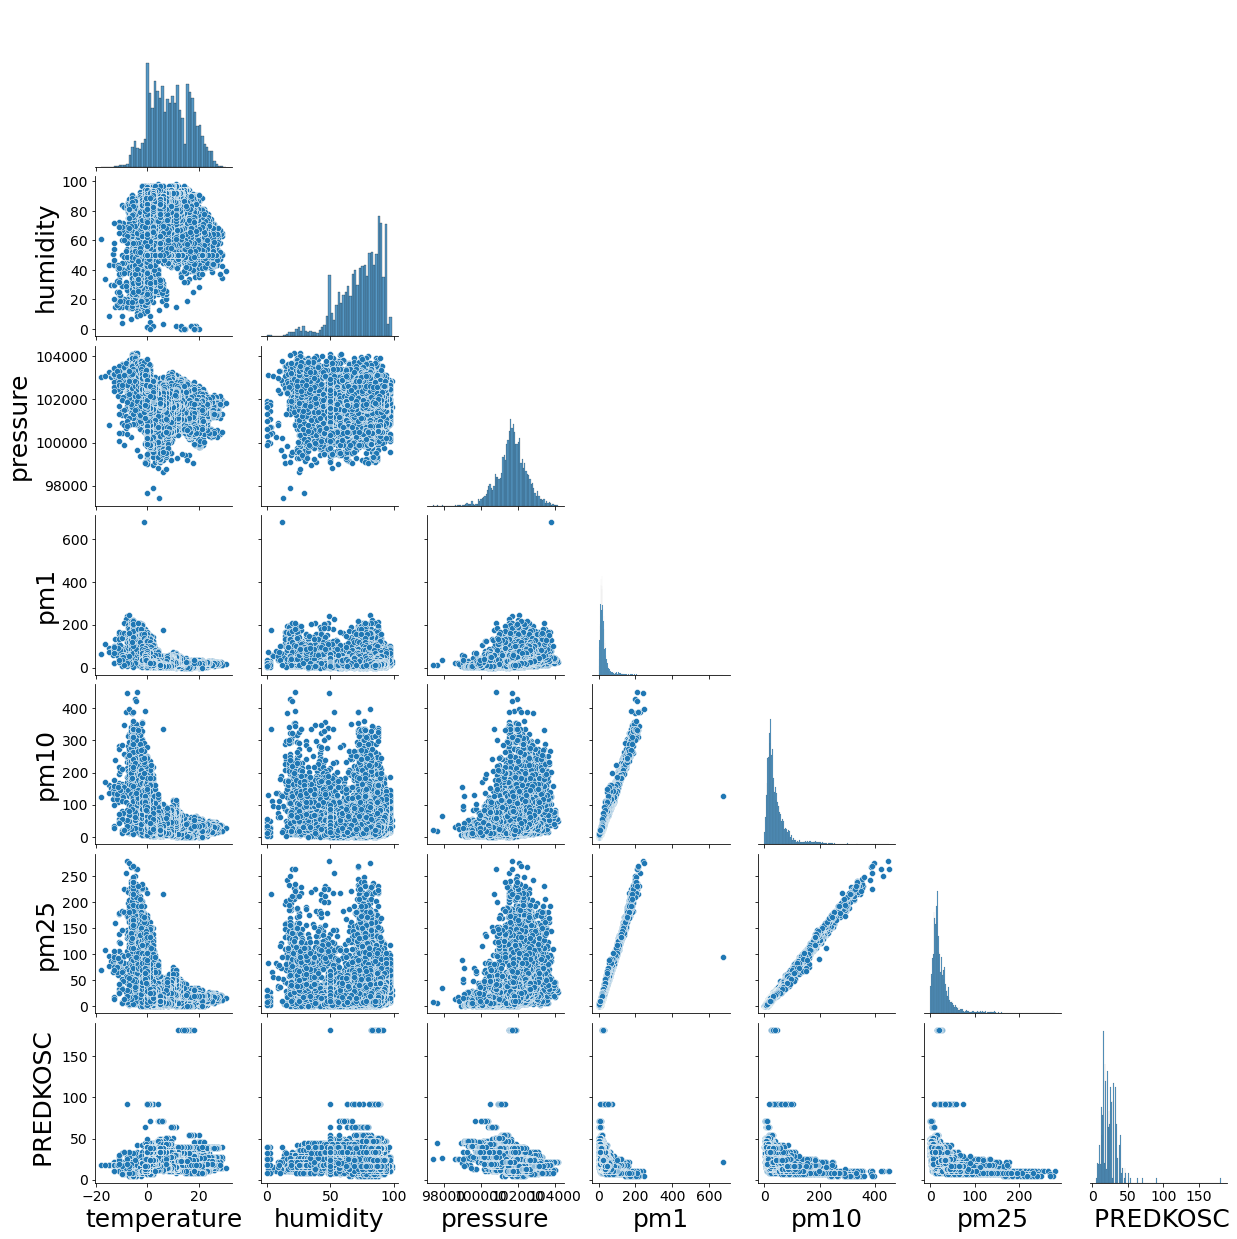

In [45]:
plt.figure(figsize=(36,36))
with sns.plotting_context(rc={"axes.labelsize":25,
                              "xtick.labelsize": 14,
                              "ytick.labelsize": 14,}):
  sns.pairplot(data=smog_data[["temperature","humidity","pressure", "pm1", "pm10", "pm25", " PREDKOSC"]], corner=True, markers=["o", "s"], palette="Set1")
plt.show()

Dodanie wartości prędkości wiatru pokazało ujemną korelację z poszczególnymi wartościami wskazań stężeń pyłu jak i ciśnienia. Nieznacze okazały się korlacje midzy danymi z pomiarów wilgodności i tmperatury względem wiatru.

W związku z otrzymanymi wytycznymi dotyczącymi wejściowego zbioru danych, tj.:
PM1 nie jest skalibrowany i dlatego może być większy niż PM2,5

*   PM1 nie jest skalibrowany i dlatego może być większy niż PM2,5
*   PM2,5 może być większy niż PM10 w granicach błędu pomiaru
*   Przez pierwsze dwa miesiące wilgotność i temperatura nie były
    kalibrowane i dlatego mogą pokazywać niedokładne wartości

Postanowiliśmy usunąć dane ze stycznia oraz lutego.






In [46]:
przedzial = (smog_data["UTC time"] > "2017-02-28") #Wyznacznie przediału do usunięcia
smog_data = smog_data.loc[przedzial] #Pozycie się przedziału
smog_data           

,UTC time,sensor_id,humidity,pm1,pm10,pm25,pressure,temperature,DZIEN,PREDKOSC
2794,2017-03-01,142,74.5,19.0,23.0,13.0,100438.5,5.0,2017/02/23,41.525424
2795,2017-03-01,147,68.0,20.0,25.5,14.5,100322.0,5.5,2017/02/23,41.525424
2796,2017-03-01,169,70.5,13.0,17.0,8.0,100366.0,5.5,2017/02/23,41.525424
2797,2017-03-01,170,70.0,14.0,19.0,9.5,100367.0,5.5,2017/02/23,41.525424
2798,2017-03-01,171,69.0,16.0,22.0,11.5,100383.5,5.0,2017/02/23,41.525424
...,...,...,...,...,...,...,...,...,...,...
16583,2017-12-25,263,85.0,4.0,8.0,4.0,101807.0,5.0,2017/12/20,33.050847
16584,2017-12-25,622,88.0,10.0,18.0,10.0,102040.0,5.0,2017/12/20,33.050847
16585,2017-12-25,808,86.0,10.0,21.0,11.0,101801.0,5.0,2017/12/20,33.050847
16586,2017-12-25,857,78.0,10.0,23.0,11.0,101774.0,5.0,2017/12/20,33.050847


In [47]:
smog_data_one = smog_data.drop(["pm1", "pm25", "sensor_id", "DZIEN"], axis=1)
smog_data_one

,UTC time,humidity,pm10,pressure,temperature,PREDKOSC
2794,2017-03-01,74.5,23.0,100438.5,5.0,41.525424
2795,2017-03-01,68.0,25.5,100322.0,5.5,41.525424
2796,2017-03-01,70.5,17.0,100366.0,5.5,41.525424
2797,2017-03-01,70.0,19.0,100367.0,5.5,41.525424
2798,2017-03-01,69.0,22.0,100383.5,5.0,41.525424
...,...,...,...,...,...,...
16583,2017-12-25,85.0,8.0,101807.0,5.0,33.050847
16584,2017-12-25,88.0,18.0,102040.0,5.0,33.050847
16585,2017-12-25,86.0,21.0,101801.0,5.0,33.050847
16586,2017-12-25,78.0,23.0,101774.0,5.0,33.050847


In [48]:
smog_data_one.set_index("UTC time")

,humidity,pm10,pressure,temperature,PREDKOSC
UTC time,,,,,
2017-03-01,74.5,23.0,100438.5,5.0,41.525424
2017-03-01,68.0,25.5,100322.0,5.5,41.525424
2017-03-01,70.5,17.0,100366.0,5.5,41.525424
2017-03-01,70.0,19.0,100367.0,5.5,41.525424
2017-03-01,69.0,22.0,100383.5,5.0,41.525424
...,...,...,...,...,...
2017-12-25,85.0,8.0,101807.0,5.0,33.050847
2017-12-25,88.0,18.0,102040.0,5.0,33.050847
2017-12-25,86.0,21.0,101801.0,5.0,33.050847


In [61]:
smog_data_one.dtypes

UTC time       datetime64[ns]
humidity              float64
pm10                  float64
pressure              float64
temperature           float64
 PREDKOSC             float64
dtype: object


# **Zamiana kolumn z sensorami na One Hot Encoder**
Poza tym do modelowania użyjemy tylko danych PM10

In [50]:
#smog_numeric = smog_data.drop(columns={"sensor_id", "pm10", "pm1", "pm25"})
#sensorone = pd.get_dummies(smog_data["sensor_id"], drop_first=True)
#smog_one = pd.concat([smog_numeric,sensorone],axis=1)
#smog_one.set_index("UTC time")

# **Podział na zbiór treningowy i zbiór testowy**
Mamy 13794 wierszy z danymi. Z uwagi, że występują one w szeregu czasowym, to podzielimy je według wierszy, w kolejności występowania.

In [51]:
przedzialmodel = (smog_data_one["UTC time"] > "2017-10-31") #Wyodrębienie potrzebnego nam przedziału czasowego
smog_data1 = smog_data_one.loc[przedzialmodel]
len(smog_data1)

2478

In [52]:
X = smog_data_one
y = smog_data_one["pm10"].copy()

In [53]:
y_train = y.head(11316)
y_test = y.tail(2478)

In [54]:
X_train = X.head(11316)
X_test = X.tail(2478)

# **Dummy Model**
Dummy model - jest modelem do którego porównane będą utworzone modele. Wszystkie modele powinny mieć lepsze parametry niż ten model.

In [55]:
dummy_model = DummyRegressor(strategy="median")
dummy_model.fit(X_train, y_train)
y_train_dummy = dummy_model.predict(X_train)
y_test_dummy = dummy_model.predict(X_test)

Wyliczymy metryki dla Regression: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R Squared

In [56]:
metrics_dataframe = pd.DataFrame(columns = ["Model", "MAPE_train [%]", "MAPE_test [%]", "RMSE_train", "RMSE_test", "MAE_train", "MAE_test", "R2"])

In [57]:
def calculate_metrics(name, y_train, y_test, y_train_pred, y_test_pred):
  global metrics_dataframe
  MAPE_train = mean_absolute_percentage_error(y_train,y_train_pred)*100
  MAPE_test = mean_absolute_percentage_error(y_test,y_test_pred)*100

  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_train = sqrt(mse_train)
  rmse_test = sqrt(mse_test)

  MAE_train = mean_absolute_error(y_train, y_train_pred)
  MAE_test = mean_absolute_error(y_test, y_test_pred)

  r2 = r2_score(y_train, y_train_pred)

  metrics_dataframe = metrics_dataframe.append({"Model": name,"R2": r2,"MAE_train": MAE_train,"MAE_test": MAE_test,"MAPE_train [%]": MAPE_train,"MAPE_test [%]": MAPE_test,"RMSE_train": rmse_train,'RMSE_test': rmse_test},
                                                 ignore_index=True)
  return metrics_dataframe

In [58]:
calculate_metrics("Dummy Model", y_train, y_test, y_train_dummy, y_test_dummy)

,Model,MAPE_train [%],MAPE_test [%],RMSE_train,RMSE_test,MAE_train,MAE_test,R2
0,Dummy Model,1.989926e+15,56.84672,18.637491,40.229556,13.204533,31.387207,-0.049404


# **Decision Tree Model**
Z uwagii na to, że model ten jest nieparametrycznym, to nie wymaga on standaryzacji danych. Do wyboru najlepszych parametrów użyliśmy GridSearchu w cross-walidacji stosująć TimeSeriesSplit, który zbiory walidacyjne dzieli ze względu na wystepowanie w czasie.

In [ ]:
tscv = TimeSeriesSplit(n_splits=5).split(X_train)

# stworzenie modelu drzewa decyzyjnego
tree_model_one = DecisionTreeRegressor()
# Nasz model sprawdzi poniższe hiperparametry
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[2,5,8,11,15,20]}
#Stworzenie GridSearch, który wyszuka najlepszych parametrów
tree_gridsearch_one = GridSearchCV(tree_model_one, 
                                                params,
                                                scoring='neg_mean_squared_error', #dla problemów regresji 
                                                cv=tscv, #crosswalidacja
                                                verbose=10)

#verbose - ma znaczenie dla wyświetlania, jeśli modele dłużej się uczą, otrzymujemy w którym momencie nauki jest model
#trenowanie modelu na tym z najlepszymi parametrami
tree_gridsearch_one.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch_one.best_params_)

tree_model_one = tree_gridsearch_one.best_estimator_

# **Polynomial Regression**

In [ ]:
polynomial_regression_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(),
                                               LinearRegression()) #pipeline tworzacy model rekresji wielomianu
# Nasz model sprawdzi poniższe hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline, 
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=tcsv,
                                                verbose=10)

#verbose - ma znaczenie dla wyświetlania, jeśli modele dłużej się uczą, otrzymujemy w którym momencie nauki jest model
polynomial_regression_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', polynomial_regression_gridsearch.best_params_)

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_

# **Random Forest**

In [ ]:
random_forest = RandomForestRegressor(n_jobs=-1,max_features=0.33)
tscv = TimeSeriesSplit(n_splits=5).split(X_train)

params_rf = {'max_depth': [2, 3, 5, 10, 20, 25],
             'min_samples_leaf': [7,10, 25, 50],
             'n_estimators': [5,10,20,40, 60,80]} #the number of decision trees you will be running in the model/the number of trees in the forest.

rf_gridsearch = GridSearchCV(random_forest,
                             params_rf, 
                             scoring='neg_mean_absolute_error',
                             cv=tscv,
                             verbose=10, 
                             n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)

random_forest = rf_gridsearch.best_estimator_

In [67]:
import joblib
import pickle

finalized_model= 
#Zapisywanie modelu na dysku
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

NameError: ignored

In [68]:
import pickle
#Wczytywanie modelu z dysku
filename = 'final_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

FileNotFoundError: ignored